<a href="https://colab.research.google.com/github/povashraful/Research_paper_implementation/blob/main/Transformer_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1117]:
!pip install datasets

# Input Embeddings


## org

In [1118]:
# all the important liberires from pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter


import math


#HuggingFace linraries
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace


#pathlib
from pathlib import Path


#typing
from typing import Any

#Library for progress bars in loops
from tqdm import tqdm


#importing library of warnings
import warnings

In [1119]:
class InputEmbedding(nn.Module):
    def __init__(self, d_model:int, vocab_size:int):
        super().__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model)

## my code

In [1120]:
 ## May delete later :

##trying the code by myself *using the logic*


# 1-  we initialize a class and we assigned InputEmbeddings as class name- we can name it whatever we like but it is best to name it according to the block names
# 2- we then call our super instructor where we give three parameters - self, d_model (dimentions of the model) and vocab size (total unique words present in the data)

class InputEmbeddings (nn.Module):
  def __init__(self, d_model, vocab_size):
    super().__init__()
    self.d_model = d_model
    self.vocab_size = vocab_size
    self.embedding = nn.embedding(d_model, vocab_size)


  def forward(self, x):
    return self.embedding(x) * math.sqrt(self.d_model)


Let us see an overview of how this works

In [1121]:
import torch
import torch.nn as nn
import math

# Step 1: define vocabulary size and embedding dimension
vocab_size = 4
d_model = 4

# Step 2: Create embedding layer (randomly initialized)
embedding_layer = nn.Embedding(vocab_size, d_model)

# Step 3: Input word IDs (e.g., 'cat' = 0, 'dog' = 1)
input_ids = torch.tensor([0, 1, 2, 3])  # batch of 4 words

# Step 4: Get their vectors
embeddings = embedding_layer(input_ids) * math.sqrt(d_model)

print("Input IDs:", input_ids)
print("Embedding vectors:\n", embeddings)


Input IDs: tensor([0, 1, 2, 3])
Embedding vectors:
 tensor([[-0.5462, -3.3705,  0.4288, -1.5553],
        [-0.1022,  1.7158, -3.2650,  2.1695],
        [-1.8142,  0.7808,  0.1239, -2.9398],
        [ 1.1793, -1.1614,  0.2403, -0.3262]], grad_fn=<MulBackward0>)


In [1122]:
embedding_layer

Embedding(4, 4)

# Positional Endocoding

## my code


In [1123]:
import torch
import torch.nn as nn
import math

In [1124]:
d_model = 6
max_sequence_length=11

In [1125]:
# lets create a matrix

pe = torch.zeros(max_sequence_length, d_model) # rows, col

In [1126]:
pe # this is for embeddings position

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [1127]:
pos = torch.arange(max_sequence_length, dtype=torch.float)

In [1128]:
pos # this is for words position

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [1129]:
pos = pos.reshape(max_sequence_length, 1)

In [1130]:
pos

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [1131]:
pos = pos.unsqueeze(1) # better than reshape
pos

tensor([[[ 0.]],

        [[ 1.]],

        [[ 2.]],

        [[ 3.]],

        [[ 4.]],

        [[ 5.]],

        [[ 6.]],

        [[ 7.]],

        [[ 8.]],

        [[ 9.]],

        [[10.]]])

In [1132]:
# so now, we have  6 (d_model) x   11 (embeddings)

In [1133]:
even_i = torch.arange(0,d_model,2)

# so it will work this numbers from 0 to the range of (d_model-1), which is 5.
#In addition, we have given step size = 2
# so, - 0,1,2,3,4,5   -> 0,2,4
#

In [1134]:
even_i

tensor([0, 2, 4])

In [1135]:
even_denominator = torch.pow(10000, even_i/d_model)

In [1136]:
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [1137]:
odd_i = torch.arange(1, d_model, 2)
odd_i

tensor([1, 3, 5])

In [1138]:
odd_donominator = torch.pow(10000, (odd_i-1)/d_model)
odd_donominator

tensor([  1.0000,  21.5443, 464.1590])

If we notice, the output of both dominators (even and odd) are the same- So, we can use either one or we can rename them as just dominator

In [1139]:
donominator = torch.pow(10000, even_i/d_model)

In [1140]:
donominator

tensor([  1.0000,  21.5443, 464.1590])

In [1141]:
even_PE = torch.sin (pos/donominator)
even_PE

tensor([[[ 0.0000,  0.0000,  0.0000]],

        [[ 0.8415,  0.0464,  0.0022]],

        [[ 0.9093,  0.0927,  0.0043]],

        [[ 0.1411,  0.1388,  0.0065]],

        [[-0.7568,  0.1846,  0.0086]],

        [[-0.9589,  0.2300,  0.0108]],

        [[-0.2794,  0.2749,  0.0129]],

        [[ 0.6570,  0.3192,  0.0151]],

        [[ 0.9894,  0.3629,  0.0172]],

        [[ 0.4121,  0.4057,  0.0194]],

        [[-0.5440,  0.4477,  0.0215]]])

In [1142]:
even_PE.shape

torch.Size([11, 1, 3])

In [1143]:
odd_PE = torch.cos (pos/donominator)
odd_PE

tensor([[[ 1.0000,  1.0000,  1.0000]],

        [[ 0.5403,  0.9989,  1.0000]],

        [[-0.4161,  0.9957,  1.0000]],

        [[-0.9900,  0.9903,  1.0000]],

        [[-0.6536,  0.9828,  1.0000]],

        [[ 0.2837,  0.9732,  0.9999]],

        [[ 0.9602,  0.9615,  0.9999]],

        [[ 0.7539,  0.9477,  0.9999]],

        [[-0.1455,  0.9318,  0.9999]],

        [[-0.9111,  0.9140,  0.9998]],

        [[-0.8391,  0.8942,  0.9998]]])

In [1144]:
odd_PE.shape

torch.Size([11, 1, 3])

 Let us see how Stack works


In [1145]:
x = torch.arange(0,5) # num of colms
x

tensor([0, 1, 2, 3, 4])

In [1146]:
torch.stack([x,x]) # number of rows

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [1147]:
test = torch.stack([x,x,x,x,x])

In [1148]:
test

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

In [1149]:
test.shape

torch.Size([5, 5])

Now let us apply stack

In [1150]:
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked

tensor([[[[ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  1.0000,  1.0000]]],


        [[[ 0.8415,  0.0464,  0.0022],
          [ 0.5403,  0.9989,  1.0000]]],


        [[[ 0.9093,  0.0927,  0.0043],
          [-0.4161,  0.9957,  1.0000]]],


        [[[ 0.1411,  0.1388,  0.0065],
          [-0.9900,  0.9903,  1.0000]]],


        [[[-0.7568,  0.1846,  0.0086],
          [-0.6536,  0.9828,  1.0000]]],


        [[[-0.9589,  0.2300,  0.0108],
          [ 0.2837,  0.9732,  0.9999]]],


        [[[-0.2794,  0.2749,  0.0129],
          [ 0.9602,  0.9615,  0.9999]]],


        [[[ 0.6570,  0.3192,  0.0151],
          [ 0.7539,  0.9477,  0.9999]]],


        [[[ 0.9894,  0.3629,  0.0172],
          [-0.1455,  0.9318,  0.9999]]],


        [[[ 0.4121,  0.4057,  0.0194],
          [-0.9111,  0.9140,  0.9998]]],


        [[[-0.5440,  0.4477,  0.0215],
          [-0.8391,  0.8942,  0.9998]]]])

In [1151]:
stacked.shape

torch.Size([11, 1, 2, 3])

In [1152]:
# now we also need to flatten it- and make it 1 dimensional

In [1153]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)

In [1154]:
PE

tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 1.0000,  1.0000,  1.0000]],

        [[ 0.8415,  0.0464,  0.0022],
         [ 0.5403,  0.9989,  1.0000]],

        [[ 0.9093,  0.0927,  0.0043],
         [-0.4161,  0.9957,  1.0000]],

        [[ 0.1411,  0.1388,  0.0065],
         [-0.9900,  0.9903,  1.0000]],

        [[-0.7568,  0.1846,  0.0086],
         [-0.6536,  0.9828,  1.0000]],

        [[-0.9589,  0.2300,  0.0108],
         [ 0.2837,  0.9732,  0.9999]],

        [[-0.2794,  0.2749,  0.0129],
         [ 0.9602,  0.9615,  0.9999]],

        [[ 0.6570,  0.3192,  0.0151],
         [ 0.7539,  0.9477,  0.9999]],

        [[ 0.9894,  0.3629,  0.0172],
         [-0.1455,  0.9318,  0.9999]],

        [[ 0.4121,  0.4057,  0.0194],
         [-0.9111,  0.9140,  0.9998]],

        [[-0.5440,  0.4477,  0.0215],
         [-0.8391,  0.8942,  0.9998]]])

In [1155]:
PE.shape

torch.Size([11, 2, 3])

In [1156]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float):
        super().__init__()
        self.d_model = d_model #
        self.seq_len = seq_len
        self.dropout = nn.Dropout(dropout)


        pe = torch.zeros(seq_len, d_model)
        position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1)
        # div term  = denominator - name has been replaced by
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self,x):

        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x)

## org

In [1157]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Dimensionality of the model
        self.seq_len = seq_len # Maximum sequence length
        self.dropout = nn.Dropout(dropout) # Dropout layer to prevent overfitting

        # Creating a positional encoding matrix of shape (seq_len, d_model) filled with zeros
        pe = torch.zeros(seq_len, d_model)

        # Creating a tensor representing positions (0 to seq_len - 1)
        position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1) # Transforming 'position' into a 2D tensor['seq_len, 1']

        # Creating the division term for the positional encoding formula
        # div term  = denominator - name has been replaced by
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sine to even indices in pe
        pe[:, 0::2] = torch.sin(position * div_term)
        # Apply cosine to odd indices in pe
        pe[:, 1::2] = torch.cos(position * div_term)

        # Adding an extra dimension at the beginning of pe matrix for batch handling
        pe = pe.unsqueeze(0)

        # Registering 'pe' as buffer. Buffer is a tensor not considered as a model parameter
        self.register_buffer('pe', pe)

    def forward(self,x):
        # Addind positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x) # Dropout for regularization

# Attention Mechanism

The input consists of queries and keys of dimension dk <br>

q = d_k
k = d_k
<br>

and values of dimensions dv
<br>

v = d_v

## My Code


In [1158]:
import numpy as np
import math

The animal didnt cross the street because it was too tired

 d_model = 512

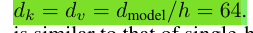

As we cannot visualize 512 - we will take small dimensions to understand simply <br>

therefore, for now, we will be using dimensions = 6

In [1159]:
d_k = 6
d_v = 6

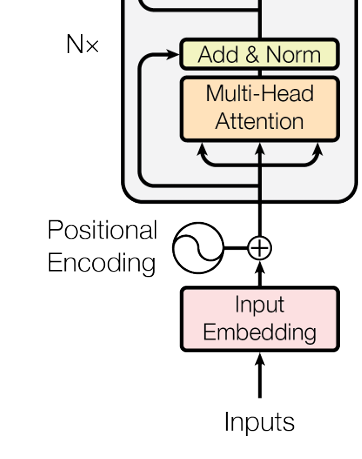

max_sequence_length = 11
L =11

In [1160]:
L, d_k, d_v = 11,6,6

In [1161]:
q = np.random.randn(L,d_k)
# 11 lines (sequence length),
# 6 dimensions (dimension of q) -  random numbers
q

array([[ 0.18394079, -0.33748309, -1.50968742, -1.19455619, -0.3799599 ,
         2.4060912 ],
       [-0.30110713, -1.11339198, -0.69406452,  0.67424484,  1.42415264,
         1.14274144],
       [-1.45334942, -0.25277993, -0.20254873, -1.05395979, -0.10937579,
         2.23440285],
       [ 0.28974527, -1.76551549, -1.09999604,  0.3226148 ,  0.04158027,
         0.15823597],
       [-0.84890719,  0.06496579, -0.52874074,  1.29567019,  0.56144133,
         0.27261938],
       [ 0.20366391, -0.70476683,  0.3562458 ,  0.2110917 , -0.31117622,
        -0.38767095],
       [ 1.31961592,  1.04237482,  0.98487102,  0.31560556, -1.72528354,
         1.51956725],
       [ 1.45592148, -0.3036138 , -0.18571442,  0.61171795, -0.85313404,
         0.09237628],
       [ 0.12545848, -1.40296586,  1.41935677, -1.04036561,  0.26754781,
         1.64932275],
       [ 0.87766999,  1.47439628, -0.17097998,  0.40542463,  1.33432467,
        -0.70035012],
       [ 1.36052068, -0.28046841,  0.30835513,  0.

In [1162]:
k = np.random.randn(L,d_k) # 11 lines (sequence length),
# 6 dimensions (dimension of k) -  random numbers
k

array([[-1.21045468, -0.03759168,  0.66175445,  0.22146822, -0.6537663 ,
        -0.80755954],
       [-0.0511339 ,  0.62709671,  0.15550583, -0.99598398,  0.64181647,
        -0.6922716 ],
       [-1.77517845,  1.77955567, -0.73674715, -0.96076989,  0.28207113,
         1.46772133],
       [-0.4510016 , -0.16504393,  0.55509117, -0.17918503, -1.76605185,
         0.81422036],
       [-0.44257917,  0.41893048, -0.65366744, -0.99866217,  2.17535546,
         1.51860942],
       [-0.55710637, -0.28649594,  1.05948272, -0.44301226, -2.24518163,
        -0.59306473],
       [-0.50416383, -0.11098051,  0.30400511, -0.19205376, -1.02044518,
         1.24369445],
       [-0.50442702, -1.3819305 ,  1.36519615, -0.3504454 , -1.26913676,
         0.31629654],
       [-0.10540427,  0.65375043,  1.21899934,  0.72198987, -0.7339238 ,
        -0.38866883],
       [ 0.3265458 ,  0.67943221, -0.09726204,  1.5260965 ,  1.07234263,
         0.47220737],
       [ 1.74834646, -1.17006316,  0.52227885,  0.

In [1163]:
v = np.random.randn(L,d_v)
# 11 lines (sequence length),
# 6 dimensions (dimension of k) -  random numbers
v

array([[-1.44212257e+00, -8.38759768e-02, -1.17894135e+00,
         1.86662146e+00,  7.64426947e-01, -5.50872367e-02],
       [-2.05006918e-01, -3.41454975e-01,  6.97023721e-01,
        -3.87049632e-02, -1.08127319e+00,  4.74394703e-01],
       [-1.71165599e-01,  9.30071799e-01,  8.99340993e-01,
         1.21438716e+00,  6.72273340e-01,  1.04685299e+00],
       [ 1.10969462e+00, -2.04979264e-01, -7.22929885e-01,
        -3.00224430e+00,  2.95444824e-01,  5.17729338e-01],
       [-9.33639172e-01, -7.94730869e-01, -6.71399751e-01,
         5.23257983e-01, -1.52922160e+00,  3.19578825e+00],
       [ 1.24469094e+00,  5.63226895e-03, -2.24984899e-01,
         9.66387067e-01, -1.16568458e+00, -1.87585441e+00],
       [ 1.41219093e-01, -6.21645340e-01,  1.27617876e-02,
        -9.30749333e-01, -1.49041134e-01, -1.35389621e+00],
       [ 5.10005756e-01, -9.91946207e-01,  3.14620972e-01,
        -1.56716531e+00, -9.67431190e-01, -2.03217896e+00],
       [ 1.09218157e+00, -1.69188005e-01, -1.809

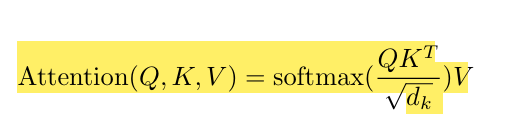

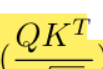

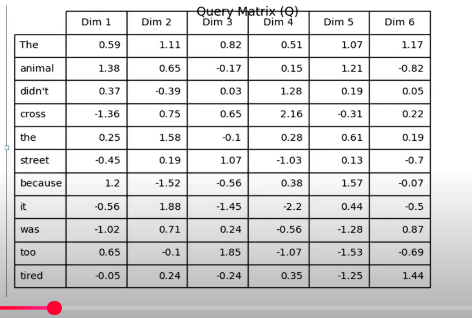

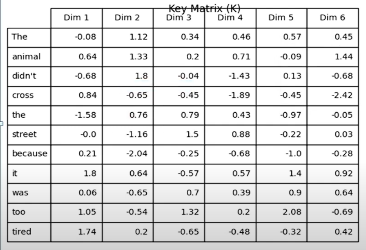

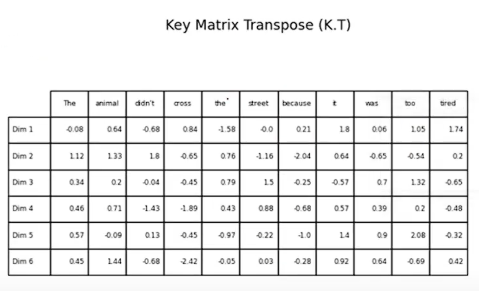

In [1164]:
q.shape

(11, 6)

In [1165]:
k.shape

(11, 6)

In [1166]:
q.shape, k.shape

((11, 6), (11, 6))

In [1167]:
k

array([[-1.21045468, -0.03759168,  0.66175445,  0.22146822, -0.6537663 ,
        -0.80755954],
       [-0.0511339 ,  0.62709671,  0.15550583, -0.99598398,  0.64181647,
        -0.6922716 ],
       [-1.77517845,  1.77955567, -0.73674715, -0.96076989,  0.28207113,
         1.46772133],
       [-0.4510016 , -0.16504393,  0.55509117, -0.17918503, -1.76605185,
         0.81422036],
       [-0.44257917,  0.41893048, -0.65366744, -0.99866217,  2.17535546,
         1.51860942],
       [-0.55710637, -0.28649594,  1.05948272, -0.44301226, -2.24518163,
        -0.59306473],
       [-0.50416383, -0.11098051,  0.30400511, -0.19205376, -1.02044518,
         1.24369445],
       [-0.50442702, -1.3819305 ,  1.36519615, -0.3504454 , -1.26913676,
         0.31629654],
       [-0.10540427,  0.65375043,  1.21899934,  0.72198987, -0.7339238 ,
        -0.38866883],
       [ 0.3265458 ,  0.67943221, -0.09726204,  1.5260965 ,  1.07234263,
         0.47220737],
       [ 1.74834646, -1.17006316,  0.52227885,  0.

In [1168]:
k = k.mT
k


array([[-1.21045468, -0.0511339 , -1.77517845, -0.4510016 , -0.44257917,
        -0.55710637, -0.50416383, -0.50442702, -0.10540427,  0.3265458 ,
         1.74834646],
       [-0.03759168,  0.62709671,  1.77955567, -0.16504393,  0.41893048,
        -0.28649594, -0.11098051, -1.3819305 ,  0.65375043,  0.67943221,
        -1.17006316],
       [ 0.66175445,  0.15550583, -0.73674715,  0.55509117, -0.65366744,
         1.05948272,  0.30400511,  1.36519615,  1.21899934, -0.09726204,
         0.52227885],
       [ 0.22146822, -0.99598398, -0.96076989, -0.17918503, -0.99866217,
        -0.44301226, -0.19205376, -0.3504454 ,  0.72198987,  1.5260965 ,
         0.33439603],
       [-0.6537663 ,  0.64181647,  0.28207113, -1.76605185,  2.17535546,
        -2.24518163, -1.02044518, -1.26913676, -0.7339238 ,  1.07234263,
        -0.42798803],
       [-0.80755954, -0.6922716 ,  1.46772133,  0.81422036,  1.51860942,
        -0.59306473,  1.24369445,  0.31629654, -0.38866883,  0.47220737,
         0.191

In [1169]:
k.shape

(6, 11)

In [1170]:
dot_product = np.matmul(q,k)
dot_product

array([[-3.16822097, -1.17557964,  4.75714952,  1.9788917 ,  4.78436621,
        -1.64996059,  3.09535458, -0.02553988, -3.59909436, -1.11667773,
         0.15226647],
       [-1.75754043, -1.33931862,  0.49567013, -1.77120934,  4.28059061,
        -4.42251811, -0.0971668 , -0.9393026 , -2.54477625,  2.30845969,
         0.24874779],
       [-0.33164723, -0.68298529,  6.54058763,  2.78606311,  4.87752824,
         0.05483387,  3.79214735,  2.02081632, -1.80809007, -1.29726283,
        -2.22839609],
       [-1.09580192, -1.69719509, -2.9117474 , -0.45228775, -0.14026457,
        -1.15115445, -0.19213827,  0.67617359, -2.38473487, -0.38629534,
         2.11824525],
       [ 0.37496694, -1.11692561,  1.32577498, -0.92308997,  1.0899454 ,
        -2.10208898, -0.22266475, -1.46378021, -0.0951378 ,  2.52646727,
        -1.59112549],
       [ 0.57896868, -0.53856119, -2.73775199,  0.41829293, -2.09470095,
         1.30093154, -0.12131094,  1.55588069,  0.48351605, -0.64158719,
         1.496

In [1171]:
dot_product.shape

(11, 11)

In [1172]:
q.var(), k.var(), dot_product.var()

(np.float64(0.9035034540495765),
 np.float64(0.8626577607335503),
 np.float64(4.718839375302654))

In [1173]:
#d_k = 6
scaled = dot_product
q.var(), k.var(), scaled.var()

# we get high variance if we dont scale it (divide it)

(np.float64(0.9035034540495765),
 np.float64(0.8626577607335503),
 np.float64(4.718839375302654))

In [1174]:
#d_k = 6
scaled = dot_product / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(np.float64(0.9035034540495765),
 np.float64(0.8626577607335503),
 np.float64(0.7864732292171089))

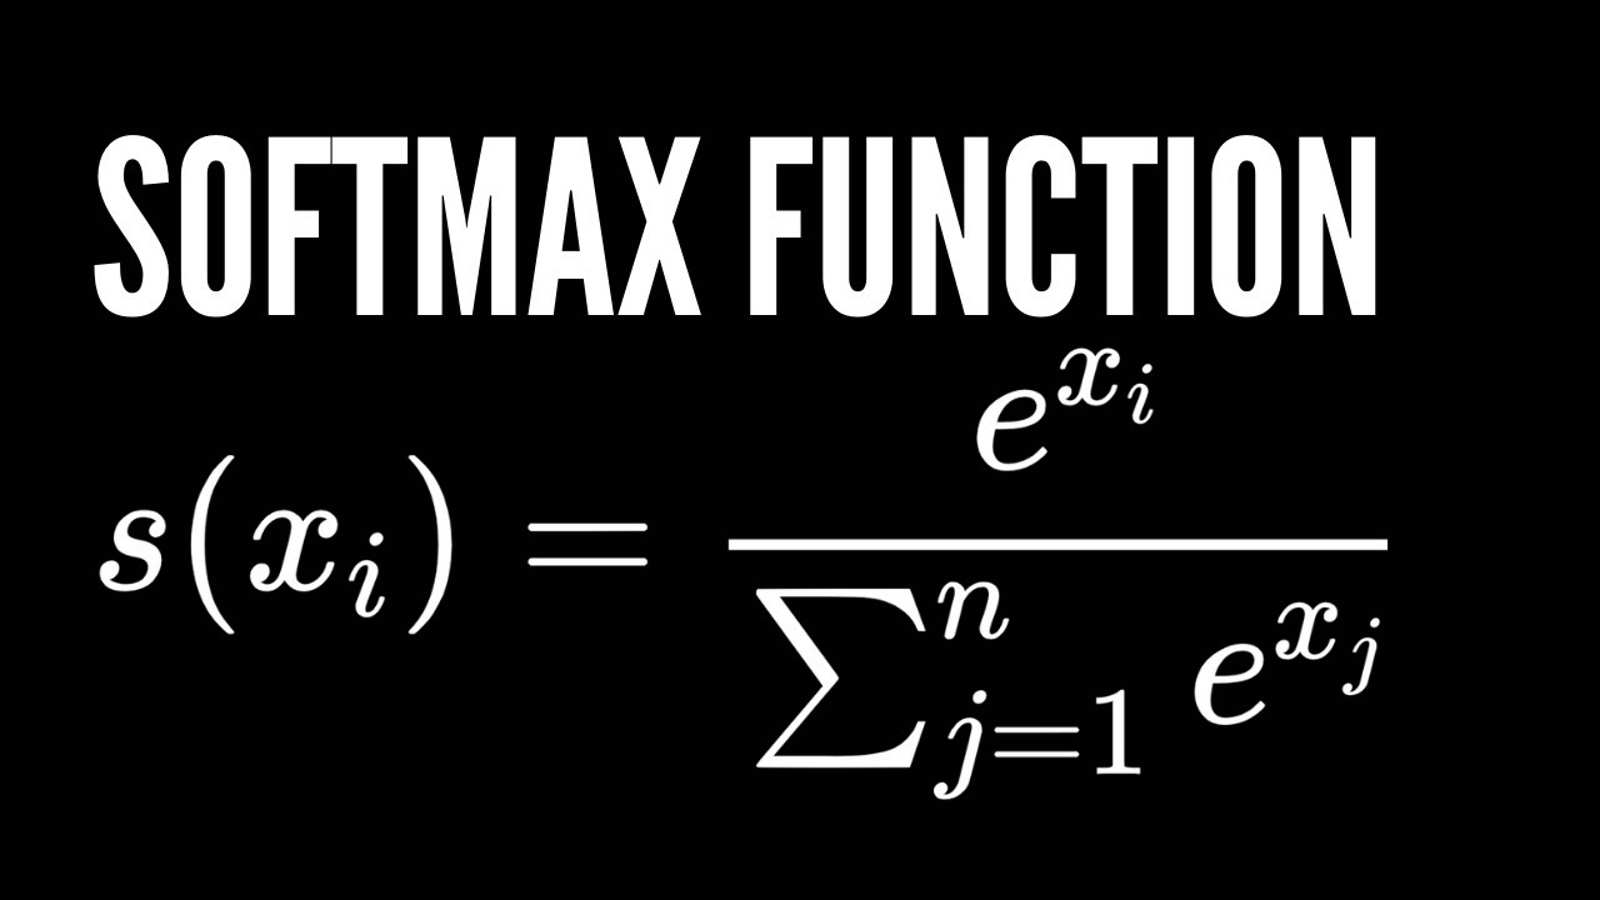

In [1175]:
def softmax(x):
  return (np.exp(x).mT / np.sum(np.exp(x), axis=1)).mT

In [1176]:
attention = softmax(scaled)
attention

array([[0.0113703 , 0.02564881, 0.28902808, 0.0929726 , 0.29225743,
        0.02113292, 0.14665735, 0.04101751, 0.00953626, 0.02627306,
        0.04410566],
       [0.03400278, 0.04033343, 0.08531171, 0.03381356, 0.40001379,
        0.0114555 , 0.06697283, 0.04748845, 0.02465685, 0.17882004,
        0.07713106],
       [0.02426528, 0.02102292, 0.40126604, 0.08664735, 0.20350356,
        0.02841243, 0.1306574 , 0.06339822, 0.01328043, 0.01635994,
        0.01118644],
       [0.0659522 , 0.05159437, 0.03142405, 0.08576782, 0.09741954,
        0.06447856, 0.09537814, 0.13595667, 0.03896741, 0.08810992,
        0.24495133],
       [0.09760402, 0.05308297, 0.14389509, 0.05745426, 0.1306873 ,
        0.03550469, 0.07647291, 0.04607421, 0.08055976, 0.2349247 ,
        0.04374008],
       [0.10233486, 0.06484636, 0.02642221, 0.09583757, 0.03435437,
        0.13741293, 0.07688897, 0.15248604, 0.09842374, 0.06217547,
        0.14881749],
       [0.02783653, 0.02074573, 0.04620634, 0.21621311, 0.

In [1177]:
attention.shape

(11, 11)

we have completed this part <br> 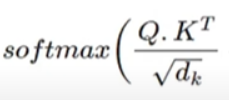

now let us dot product attention with V

In [1178]:
v

array([[-1.44212257e+00, -8.38759768e-02, -1.17894135e+00,
         1.86662146e+00,  7.64426947e-01, -5.50872367e-02],
       [-2.05006918e-01, -3.41454975e-01,  6.97023721e-01,
        -3.87049632e-02, -1.08127319e+00,  4.74394703e-01],
       [-1.71165599e-01,  9.30071799e-01,  8.99340993e-01,
         1.21438716e+00,  6.72273340e-01,  1.04685299e+00],
       [ 1.10969462e+00, -2.04979264e-01, -7.22929885e-01,
        -3.00224430e+00,  2.95444824e-01,  5.17729338e-01],
       [-9.33639172e-01, -7.94730869e-01, -6.71399751e-01,
         5.23257983e-01, -1.52922160e+00,  3.19578825e+00],
       [ 1.24469094e+00,  5.63226895e-03, -2.24984899e-01,
         9.66387067e-01, -1.16568458e+00, -1.87585441e+00],
       [ 1.41219093e-01, -6.21645340e-01,  1.27617876e-02,
        -9.30749333e-01, -1.49041134e-01, -1.35389621e+00],
       [ 5.10005756e-01, -9.91946207e-01,  3.14620972e-01,
        -1.56716531e+00, -9.67431190e-01, -2.03217896e+00],
       [ 1.09218157e+00, -1.69188005e-01, -1.809

now, let us complete the full formula

In [1179]:
v.shape

(11, 6)

In [1180]:
new_attention = np.matmul(attention, v)
new_attention

array([[-0.11675289, -0.18582818,  0.03880007,  0.14698977, -0.33937889,
         1.00969946],
       [-0.02244074, -0.56120541, -0.00737189,  0.52158801, -0.72806438,
         1.31384139],
       [-0.07275626,  0.01565996,  0.17966889,  0.20636064, -0.13380196,
         0.79333608],
       [ 0.25236077, -0.58009457, -0.02432366,  0.08668326, -0.35212465,
         0.03634477],
       [ 0.33977113, -0.33310385,  0.19653972,  0.49421052, -0.25505366,
         0.56829851],
       [ 0.38435138, -0.45125884, -0.07613993, -0.09998241, -0.27666837,
        -0.25232149],
       [ 0.62854754, -0.37815264, -0.11297673, -0.63956377, -0.12298708,
        -0.18154057],
       [ 0.45970952, -0.54747046, -0.02044143,  0.04803082, -0.19821398,
        -0.06627987],
       [ 0.24938412, -0.596295  , -0.04890522, -0.49811703, -0.50277033,
        -0.22438504],
       [ 0.37526549, -0.43953716,  0.34742477,  0.64957214, -0.50361651,
         0.90452224],
       [ 0.43730614, -0.59634818,  0.10018567,  0.

## Decoder part (masked multi-head attention)

Now let us make attention with masking

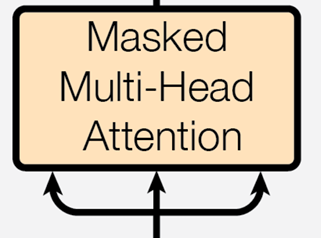

**Attention with masking**

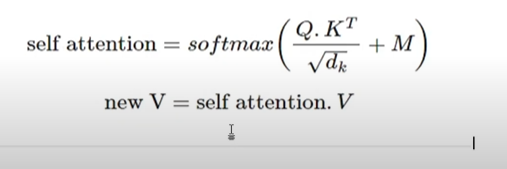

In [1181]:
mask=np.tril(np.ones((L,L))) # 11 x 11
mask

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [1182]:
mask.shape

(11, 11)

In [1183]:
mask[mask==0]=-np.inf
mask[mask==1]= 0

In [1184]:
mask

array([[  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [1185]:
#d_k = 6
scaled = dot_product / math.sqrt(d_k)


In [1186]:
scaled

array([[-1.29342079, -0.47992838,  1.94209816,  0.80787915,  1.95320933,
        -0.67359359,  1.26367321, -0.01042661, -1.46932412, -0.45588177,
         0.06216252],
       [-0.71751288, -0.54677454,  0.20235648, -0.72309318,  1.7475438 ,
        -1.80548546, -0.03966818, -0.38346868, -1.03890055,  0.94242472,
         0.10155086],
       [-0.13539442, -0.27882758,  2.67018372,  1.1374055 ,  1.99124256,
         0.02238583,  1.54813767,  0.82499481, -0.73814968, -0.52960533,
        -0.90973889],
       [-0.44735926, -0.692877  , -1.1887159 , -0.1846457 , -0.05726277,
        -0.46995684, -0.07844012,  0.27604671, -0.97356393, -0.15770441,
         0.86477   ],
       [ 0.15307961, -0.45598297,  0.54124537, -0.3768499 ,  0.44496835,
        -0.85817423, -0.0909025 , -0.59758577, -0.03883985,  1.03142594,
        -0.64957426],
       [ 0.23636298, -0.21986668, -1.11768257,  0.17076737, -0.85515808,
         0.53110308, -0.04952498,  0.63518563,  0.1973946 , -0.26192687,
         0.610

In [1187]:
scaled + mask

array([[-1.29342079,        -inf,        -inf,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [-0.71751288, -0.54677454,        -inf,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [-0.13539442, -0.27882758,  2.67018372,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [-0.44735926, -0.692877  , -1.1887159 , -0.1846457 ,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.15307961, -0.45598297,  0.54124537, -0.3768499 ,  0.44496835,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.23636298, -0.21986668, -1.11768257,  0.17076737, -0.85515808,
         0.53110308,        -inf,        -inf,        -inf,        -inf,
              

In [1188]:
mask_attention = softmax(scaled+ mask)
mask_attention

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.45741881, 0.54258119, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05433893, 0.04707809, 0.89858298, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.28096038, 0.21979514, 0.13386837, 0.3653761 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.20219441, 0.10996555, 0.29808999, 0.11902103, 0.27072902,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.22188426, 0.14060102, 0.0572891 , 0.20779672, 0.07448776,
        0.29794115, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.04563078, 0.03400725, 0.07574334, 0.35442547, 0.

In [1189]:
mask_attention.shape

(11, 11)

In [1190]:
new_mask_attention = np.matmul(mask_attention, v)
new_mask_attention

array([[-1.44212257, -0.08387598, -1.17894135,  1.86662146,  0.76442695,
        -0.05508724],
       [-0.77088688, -0.2236335 , -0.16107798,  0.83282718, -0.23701524,
         0.23219971],
       [-0.24182123,  0.81511391,  0.77688464,  1.19083569,  0.59472724,
         0.96002449],
       [-0.0676966 , -0.0490033 , -0.32178137, -0.41844076,  0.17505971,
         0.41809875],
       [-0.48584181, -0.01681599, -0.16145346,  0.51949181, -0.14278251,
         1.27989845],
       [ 0.17327646, -0.11345036, -0.37932963,  0.18134939, -0.3437211 ,
        -0.098814  ],
       [ 0.5936819 , -0.18840649, -0.28097755, -0.89115742, -0.1768807 ,
        -0.39142426],
       [ 0.39717888, -0.35556565, -0.18984614, -0.62405179, -0.43201723,
        -0.62751941],
       [ 0.24336442, -0.54418011, -0.08496494, -0.80575418, -0.57516802,
        -0.31363194],
       [ 0.39884608, -0.40949962,  0.37257983,  0.62011805, -0.53628432,
         0.94519166],
       [ 0.43730614, -0.59634818,  0.10018567,  0.

In [1191]:
new_mask_attention.shape

(11, 6)

# Multi-Head Attention

### My Code

The animal didn't cross the street because it was too tired

In [1192]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [1193]:
sequence_length = 11
batch_size = 1
input_dim = 512
d_model = 512
t = torch.randn(batch_size,sequence_length, input_dim)
t

tensor([[[ 0.6991, -0.5985,  0.8390,  ..., -0.2144,  0.7287, -1.5907],
         [ 0.8825,  0.0906, -1.3308,  ..., -0.8992,  0.5718,  1.1343],
         [-0.3062,  0.2640, -0.3504,  ...,  1.7071,  1.3152, -1.0711],
         ...,
         [ 0.5284, -0.3514,  1.0476,  ..., -1.2974, -0.5357, -1.1869],
         [-0.6751,  0.3395, -1.6166,  ...,  0.4375,  0.9221,  0.2345],
         [ 0.2413,  0.1355,  0.1682,  ..., -1.1693, -0.2961,  0.0634]]])

In [1194]:
t.shape

torch.Size([1, 11, 512])

In [1195]:
qkv_layers = nn.Linear(input_dim, 3 * d_model)
#(512, 3 * 512)
#dimensions of input and model is 512 -
# as there are three items qkv)- we are multiplying it by 3

In [1196]:
qkv_layers

Linear(in_features=512, out_features=1536, bias=True)

In [1197]:
qkv = qkv_layers(t)

In [1198]:
qkv.shape

torch.Size([1, 11, 1536])

In [1199]:
d_model

512

In [1200]:
num_of_heads = 8 # the number of head depends on us
head_dim = d_model// num_of_heads

In [1201]:
head_dim

64

In [1202]:
qkv.shape

torch.Size([1, 11, 1536])

In [1203]:
t = torch.rand(10,2) # 10 rows, 2 cols
t

tensor([[0.7277, 0.5949],
        [0.4153, 0.4698],
        [0.5085, 0.7763],
        [0.2210, 0.6046],
        [0.0462, 0.8961],
        [0.7802, 0.8648],
        [0.7389, 0.8158],
        [0.3357, 0.9092],
        [0.2672, 0.6243],
        [0.6333, 0.6955]])

In [1204]:
t.shape

torch.Size([10, 2])

In [1205]:
t.reshape(5,4) # 5 rows, 4 cols  {we could also write - (2,5,2)}

tensor([[0.7277, 0.5949, 0.4153, 0.4698],
        [0.5085, 0.7763, 0.2210, 0.6046],
        [0.0462, 0.8961, 0.7802, 0.8648],
        [0.7389, 0.8158, 0.3357, 0.9092],
        [0.2672, 0.6243, 0.6333, 0.6955]])

In [1206]:
t.shape

torch.Size([10, 2])

Now let us work with qkv

In [1207]:
#sequence_length = 11
#batch_size = 1
#input_dim = 512
#d_model = 512
# written this code above
# head_dim = 64

qkv = qkv.reshape(batch_size, sequence_length, num_of_heads, 3 * head_dim )

In [1208]:
qkv.shape # 512/8 =64 = (q,k,v)- each one will get 64 (64*3=192)

torch.Size([1, 11, 8, 192])

In [1209]:
# we could also write

In [1210]:
# qkv = qkv.reshape(batch_size, sequence_length, 2, 768 )

In [1211]:
# qkv.shape

In [1212]:
# the output would have been like this

# torch.Size([1, 11, 8, 192])

we are going to use permute <br><br>
permute is used to change the position of the dimension

In [1213]:
# commented out
# torch.Size([1, 11, 8, 192])
# position  = index - so 0,1,2,3

In [1214]:
# commented out
# qkv = qkv.permute(3,2,1,0)

In [1215]:
# commented out
# qkv.shape

In [1216]:
# commented out
# see- first the shape was like this -
# [1, 11, 8, 192]
# after permuting it became like this
# [192, 8, 11, 1]

In [1217]:
qkv = qkv.permute(0,2,1,3)

In [1218]:
qkv.shape

torch.Size([1, 8, 11, 192])

now we want to sepeare q,k,v from the last dimension (192) <br> <br>

we can do it by using chunk - <br> <br>

q,k,v = qkv.chunk(3, dim=-1)

here, 3 = number of segments we want
dim = which dimension we want to break

In [1219]:
q,k,v = qkv.chunk(3, dim=-1) # last dimension

In [1220]:
q.shape, k.shape, v.shape

(torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]))

Well, we have q,k,v(1536) - 512 * 8 = 1536
<br>
Too much computation- so what we <br>
 can do is, we can segment the total dimension of each items-

(refer to the paper for this)

Q = 512 | 64=1, 64=2, 64=3, 64=4, 64=5, 65=6, 65=7, 65=8 <br> <br>

K = 512 | 64=1, 64=2, 64=3, 64=4, 64=5, 65=6, 65=7, 65=8 <br> <br>

V = 512 | 64=1, 64=2, 64=3, 64=4, 64=5, 65=6, 65=7, 65=8 <br> <br>

Let us now focus on the main equation of multi-head attention

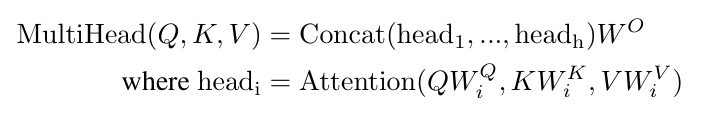

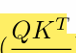

In [1221]:
q.shape

torch.Size([1, 8, 11, 64])

In [1222]:
k.shape

torch.Size([1, 8, 11, 64])

In [1223]:
k.mT
k.mT.shape

torch.Size([1, 8, 64, 11])

as we can see, the k has been transposed
<br> if we notice carefully, all the values
inside k has been reversed.<br>
 however, we only want to reverse the last two index (dimension)

In [1224]:
k.shape

torch.Size([1, 8, 11, 64])

In [1225]:
k.transpose(-2,-1).shape

torch.Size([1, 8, 64, 11])

In [1226]:
trans = torch.matmul(q,k.transpose(-2,-1))

In [1227]:
trans

tensor([[[[ 1.8616e+00, -2.1437e+00, -1.4734e+00, -3.4335e+00, -3.1746e+00,
           -1.3201e+00, -1.8329e+00,  8.7239e-03, -2.4654e+00,  2.2012e+00,
            4.8871e-02],
          [-1.4026e+00,  3.8185e-01,  2.9535e+00,  3.6317e+00,  4.0274e+00,
           -1.9000e+00,  2.9234e-02, -2.3742e+00, -2.3105e+00,  1.2615e+00,
            2.7248e+00],
          [-7.1034e-01, -1.4364e+00,  1.5912e+00, -4.3283e+00, -1.3501e+00,
            2.5985e+00,  3.3148e+00,  4.4640e+00, -1.5020e+00, -7.7446e-01,
           -2.8678e+00],
          [-3.3042e+00,  2.5352e+00, -2.3565e+00, -1.7523e+00,  1.7199e+00,
           -2.6339e+00, -6.8128e-01, -3.1254e-02,  2.2209e+00, -3.2483e+00,
            3.2170e+00],
          [-2.8496e+00,  3.1910e+00, -1.4238e+00,  1.0585e+00,  2.6531e-01,
           -1.8065e+00, -1.4476e+00,  1.7263e+00, -3.7861e+00,  2.1398e+00,
            1.6211e+00],
          [-1.4748e+00,  1.6439e+00, -4.2296e+00, -2.5867e+00, -3.3797e+00,
            7.3533e-01, -1.0965e+00,  3

In [1228]:
trans.shape

torch.Size([1, 8, 11, 11])

In [1229]:
k.size()

torch.Size([1, 8, 11, 64])

In [1230]:
d_k= k.size()[-1]

In [1231]:
d_k

64

now we need to scale it

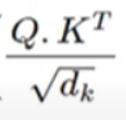

In [1232]:
q.shape

torch.Size([1, 8, 11, 64])

In [1233]:
k.shape

torch.Size([1, 8, 11, 64])

In [1234]:
scaled = torch.matmul(q,k.transpose(-2,-1)) / math.sqrt(d_k)

In [1235]:
scaled

tensor([[[[ 2.3270e-01, -2.6796e-01, -1.8417e-01, -4.2918e-01, -3.9682e-01,
           -1.6501e-01, -2.2911e-01,  1.0905e-03, -3.0818e-01,  2.7516e-01,
            6.1089e-03],
          [-1.7532e-01,  4.7731e-02,  3.6918e-01,  4.5397e-01,  5.0343e-01,
           -2.3750e-01,  3.6543e-03, -2.9678e-01, -2.8881e-01,  1.5769e-01,
            3.4060e-01],
          [-8.8792e-02, -1.7955e-01,  1.9891e-01, -5.4103e-01, -1.6877e-01,
            3.2481e-01,  4.1434e-01,  5.5800e-01, -1.8775e-01, -9.6808e-02,
           -3.5847e-01],
          [-4.1302e-01,  3.1690e-01, -2.9456e-01, -2.1904e-01,  2.1499e-01,
           -3.2924e-01, -8.5160e-02, -3.9068e-03,  2.7761e-01, -4.0604e-01,
            4.0212e-01],
          [-3.5620e-01,  3.9888e-01, -1.7797e-01,  1.3231e-01,  3.3163e-02,
           -2.2581e-01, -1.8095e-01,  2.1579e-01, -4.7326e-01,  2.6747e-01,
            2.0264e-01],
          [-1.8435e-01,  2.0549e-01, -5.2869e-01, -3.2333e-01, -4.2247e-01,
            9.1917e-02, -1.3706e-01,  4

In [1236]:
scaled.shape

torch.Size([1, 8, 11, 11])

here, we did the multiplication for all <br> the heads in the batch ( for now we <br> have 1 batch)- we scaled all of <br> them- not for only 1 single attention

now let us make the Masked- multi-head attention

In [1237]:
mask = torch.full(scaled.size(),float('-inf'))
mask

tensor([[[[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -in

In [1238]:
mask.shape

torch.Size([1, 8, 11, 11])

In [1239]:
new_mask = torch.triu(mask,diagonal=1)
new_mask

tensor([[[[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., -inf, -inf, -inf, -inf,

In [1241]:
# let us mask for single head
new_mask[0][0]

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [1242]:
scaled + new_mask

tensor([[[[ 2.3270e-01,        -inf,        -inf,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-1.7532e-01,  4.7731e-02,        -inf,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-8.8792e-02, -1.7955e-01,  1.9891e-01,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-4.1302e-01,  3.1690e-01, -2.9456e-01, -2.1904e-01,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-3.5620e-01,  3.9888e-01, -1.7797e-01,  1.3231e-01,  3.3163e-02,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-1.8435e-01,  2.0549e-01, -5.2869e-01, -3.2333e-01, -4.2247e-01,
            9.1917e-02,        -inf,   

In [1243]:
(scaled + new_mask).shape

torch.Size([1, 8, 11, 11])

In [1244]:
(scaled + new_mask)[0][0]

tensor([[ 0.2327,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.1753,  0.0477,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.0888, -0.1796,  0.1989,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.4130,  0.3169, -0.2946, -0.2190,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.3562,  0.3989, -0.1780,  0.1323,  0.0332,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.1843,  0.2055, -0.5287, -0.3233, -0.4225,  0.0919,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [ 0.3597,  0.1304, -0.2654, -0.3725,  0.1592,  0.0655,  0.3703,    -inf,
            -inf,    -inf,    -inf],
        [ 0.5770, -0.1744, -0.2545,  0.0937,  0.0984,  0.1320, -0.3217,  0.6800,
            -inf,    -inf,    -inf],
        [-0.0836, -0.2373,  0.2178, -0.0008, -0.4145, -0